# Twitter Sentiment Analysis

---

Sentiment analysis is a natural language processing (NLP) problem where machine learning models are employed to classify text data, such as tweets, into different sentiment categories, typically positive, negative, or neutral. This process involves various techniques from classification algorithms to text mining, analysis, and visualization methods.

# Problem Statement
---

The task at hand involves detecting hate speech in tweets, particularly focusing on tweets with racist or sexist sentiments. The objective is to classify tweets into two categories: those containing hate speech (labeled as '1') and those that do not (labeled as '0').

In essence, given a dataset of tweets along with their corresponding labels indicating whether they contain racist/sexist sentiments or not, the goal is to develop a model that accurately predicts these labels for tweets in a test dataset.

# Success Metrics
---
The evaluation metric for this task is the Acurracy , F1 score

# Objective
---
1) Detect Hate Speech: Accurately identify tweets with racist or sexist sentiments.

2) Binary Classification: Develop a model to categorize tweets as containing hate speech (1) or not (0).

3) Evaluation: Assess model performance using the F1-Score, balancing precision and recall.

### Importing Necessary Libraries

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

### Load the datasets

In [8]:
train = pd.read_csv('Dataset/train_tweet.csv')
test = pd.read_csv('Dataset/test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


- The training dataset, named train_tweet.csv, consists of 31,962 samples or instances with 3 features or attributes. On the other hand, the test dataset, test_tweets.csv, contains 17,197 samples or instances with 2 features or attributes.

In [9]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [10]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [11]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [12]:
# checking out the negative comments from the train set

train[train['label'] == 1].head(10)


,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [13]:
# checking out the positive comments from the train set
train[train['label'] == 0].head(10)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


## Exploratory data analysis and data pre-processing

### Distribution of Positive and Negative Labels in Training Dataset

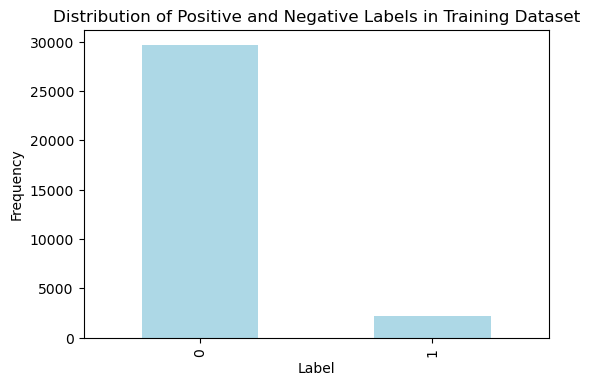

In [14]:

# Calculate label frequencies
label_counts = train['label'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color='lightblue')

# Add title and labels
plt.title('Distribution of Positive and Negative Labels in Training Dataset')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Show plot
plt.show()


### Distribution of Tweet Lengths in Training and Test Datasets

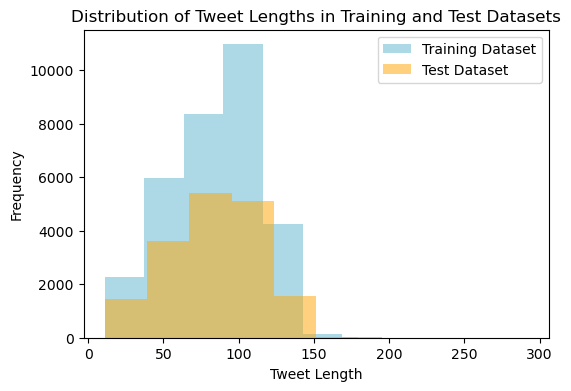

In [15]:
# checking the distribution of tweets in the data
# Visualize distribution of tweet lengths in the training dataset
length_train = train['tweet'].str.len().plot.hist(color='lightblue', figsize=(6, 4))

# Visualize distribution of tweet lengths in the test dataset
length_test = test['tweet'].str.len().plot.hist(color='orange', alpha=0.5, figsize=(6, 4))

# Add title and labels
plt.title('Distribution of Tweet Lengths in Training and Test Datasets')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')

# Add legend
plt.legend(['Training Dataset', 'Test Dataset'], loc='upper right')

# Show plot
plt.show()

### Adding Tweet Length as a Feature to the Dataset(Feature Engineering)

In [16]:
# Adding a new column 'len' to the training dataset to represent the length of each tweet
train['len'] = train['tweet'].str.len()

# Adding a new column 'len' to the test dataset to represent the length of each tweet
test['len'] = test['tweet'].str.len()

# Displaying the first 10 rows of the training dataset with the newly added 'len' column
train.head(10)


,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


### Summary Statistics by Label for Training Dataset

In [17]:
train.groupby('label').describe()


id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

### Relationship between Tweet Length and Mean Label Value

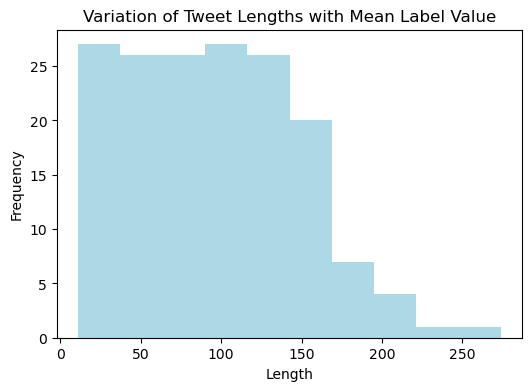

In [18]:
# Filter out non-numeric values in the 'len' column
numeric_lengths = pd.to_numeric(train['len'], errors='coerce')

# Group the numeric tweet lengths by value, calculate the mean label value for each length, and plot a histogram
numeric_lengths.groupby(numeric_lengths).mean().plot.hist(color='lightblue', figsize=(6, 4))

# Add a title to the plot
plt.title('Variation of Tweet Lengths with Mean Label Value')

# Add a label to the x-axis
plt.xlabel('Length')

# Display the plot
plt.show()


### Top 30 Most Frequently Occurring Words in Tweets

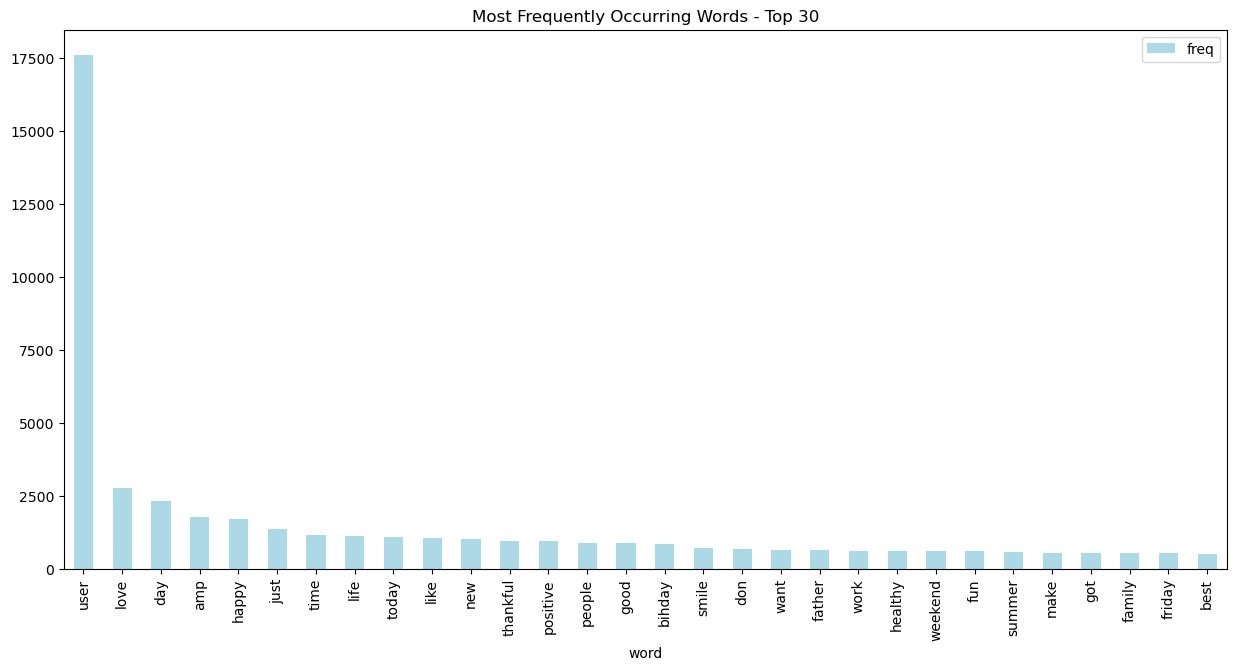

In [19]:
from sklearn.feature_extraction.text import CountVectorizer


# Initialize CountVectorizer with English stop words
cv = CountVectorizer(stop_words='english')

# Convert the tweet text data into a matrix of token counts
words = cv.fit_transform(train.tweet)

# Sum the counts of each word
sum_words = words.sum(axis=0)

# Get the frequency of each word and sort them
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Create a DataFrame for the word frequency
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

# Plot the top 30 most frequently occurring words
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color='lightblue')
plt.title("Most Frequently Occurring Words - Top 30")
plt.show()


- This visualization helps in understanding which words occur most frequently in the dataset, which can provide insights into the common themes or topics discussed in the tweets.

### Word Cloud of Most Frequent Words in Tweets

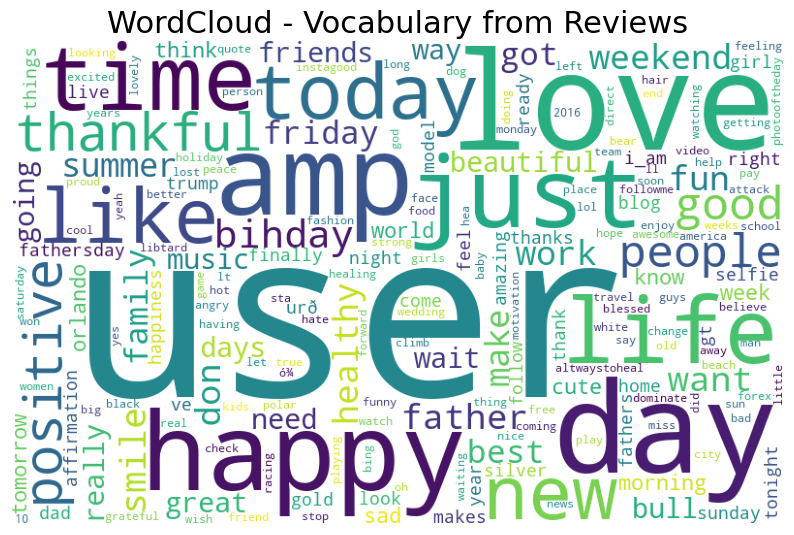

In [20]:
from wordcloud import WordCloud


# Generate word cloud from word frequencies
wordcloud = WordCloud(background_color='white', width=800, height=500).generate_from_frequencies(dict(words_freq))

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize=22)
plt.axis('off')  # Turn off axis
plt.show()


- This visualization provides a graphical representation of the most common words in the dataset, where the size of each word corresponds to its frequency. It offers a quick and intuitive way to understand the most prevalent terms in the text data.

### Word Cloud of Neutral Tweets

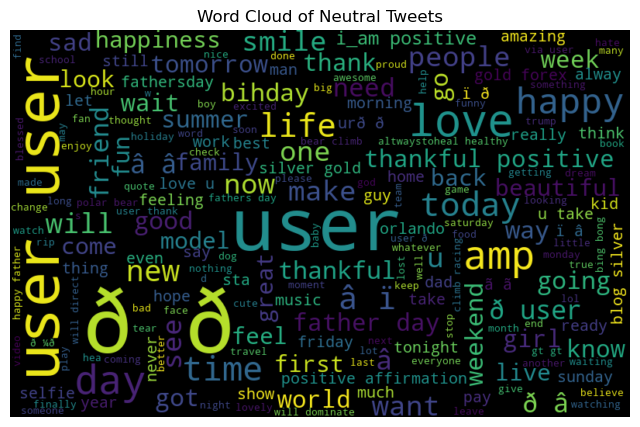

In [21]:
normal_words = ' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=0, max_font_size=110).generate(normal_words)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Neutral Tweets')
plt.show()


- This code generates a word cloud visualization for neutral (non-hate speech) tweets. It creates a word cloud based on the text content of tweets labeled as neutral (with label 0).

### Word Cloud of Negative Tweets

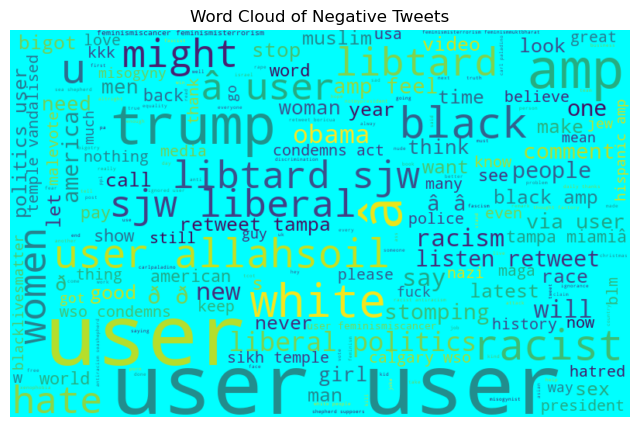

In [22]:
negative_words = ' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color='cyan', width=800, height=500, random_state=0, max_font_size=110).generate(negative_words)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Negative Tweets')
plt.show()


- This code generates a word cloud visualization for negative (hate speech) tweets. It creates a word cloud based on the text content of tweets labeled as negative (with label 1).

### Hashtag Extraction Function

In [23]:
import re

def hashtag_extract(x):
    return [re.findall(r"#(\w+)", tweet) for tweet in x]


In [24]:
# Extracting hashtags from non-racist/sexist tweets
HT_regular = sum(hashtag_extract(train['tweet'][train['label'] == 0]), [])

# Extracting hashtags from racist/sexist tweets
HT_negative = sum(hashtag_extract(train['tweet'][train['label'] == 1]), [])


- Hashtag Extraction from Non-Racist/Sexist Tweets

### Top 10 Most Frequent Hashtags in Non-Racist/Sexist Tweets


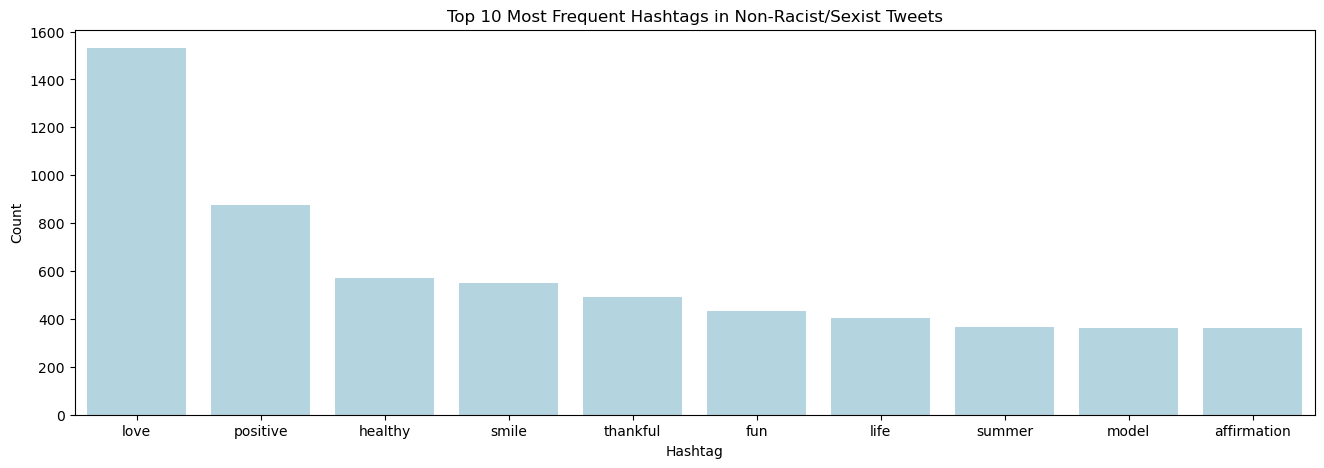

In [25]:
import nltk

# Create a frequency distribution of hashtags from non-racist/sexist tweets
freq_dist_regular = nltk.FreqDist(HT_regular)

# Convert the frequency distribution to a DataFrame
df_hashtags_regular = pd.DataFrame(freq_dist_regular.items(), columns=['Hashtag', 'Count'])

# Select the top 20 most frequent hashtags
df_top_hashtags_regular = df_hashtags_regular.nlargest(columns="Count", n=10)

# Plot the top 20 most frequent hashtags
plt.figure(figsize=(16,5))
sns.barplot(data=df_top_hashtags_regular, x="Hashtag", y="Count",color='lightblue')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Hashtags in Non-Racist/Sexist Tweets')
plt.show()


### Top 10 Most Frequent Hashtags in Racist/Sexist Tweets

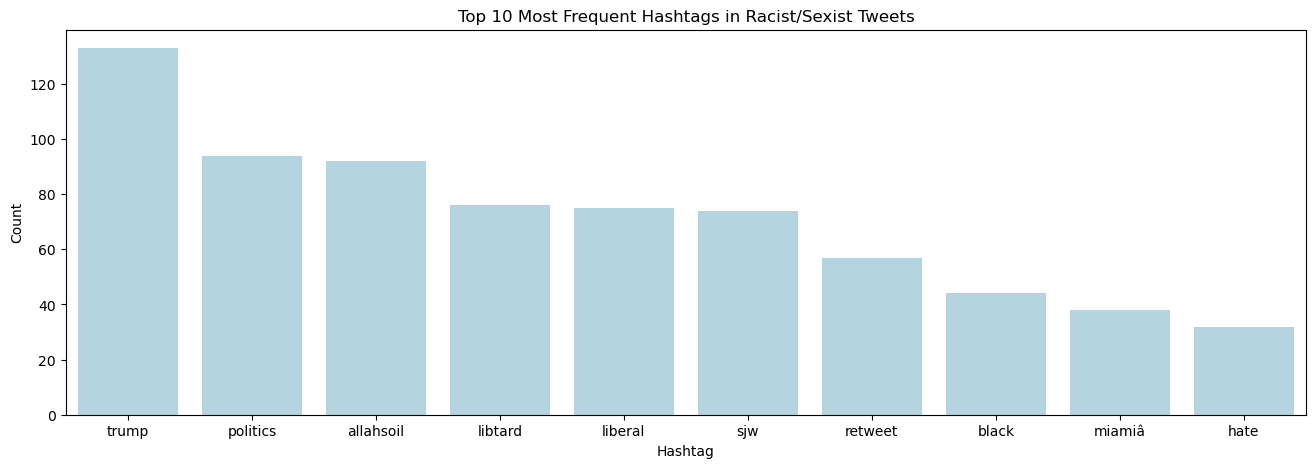

In [26]:
# Create a frequency distribution of hashtags from racist/sexist tweets
freq_dist_negative = nltk.FreqDist(HT_negative)

# Convert the frequency distribution to a DataFrame
df_hashtags_negative = pd.DataFrame(freq_dist_negative.items(), columns=['Hashtag', 'Count'])

# Select the top 20 most frequent hashtags
df_top_hashtags_negative = df_hashtags_negative.nlargest(columns="Count", n=10)

# Plot the top 20 most frequent hashtags with light blue color
plt.figure(figsize=(16,5))
sns.barplot(data=df_top_hashtags_negative, x="Hashtag", y="Count", color='lightblue')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Hashtags in Racist/Sexist Tweets')
plt.show()

### Word Embedding Training using Gensim's Word2Vec

In [27]:
from gensim.models import Word2Vec

# Tokenize the words in the training set
tokenized_tweet = [tweet.split() for tweet in train['tweet']]

# Train the Word2Vec model
model_w2v = Word2Vec(
    tokenized_tweet,
    vector_size=200,  # Desired number of features/independent variables
    window=5,  # Context window size
    min_count=2,
    sg=1,  # 1 for skip-gram model
    hs=0,
    negative=10,  # For negative sampling
    workers=2,  # Number of cores
    seed=34
)

model_w2v.train(tokenized_tweet, total_examples=len(train['tweet']), epochs=20)


(6110018, 8411580)

The above cell tokenizes the words in the training set and trains a Word2Vec model using the specified parameters such as vector size, window size, and training algorithm. The model is trained on the tokenized tweets for 20 epochs to learn word embeddings based on the contextual information in the tweets.

In [28]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6637927293777466),
 ('#prosecco', 0.6187105774879456),
 ('sister!!', 0.5996224284172058),
 ('#deutschland', 0.5941580533981323),
 ('podium', 0.5939013957977295),
 ('coaching', 0.5889840722084045),
 ('fluffy', 0.5885925889015198),
 ('#restaurant', 0.5846755504608154),
 ('#wanderlust', 0.5817563533782959),
 ('toes', 0.5771750807762146)]

- This  allows us to explore the semantic relationships captured by the word vectors. By finding similar words, we can gain insights into the context and associations of the given word within the corpus.

- This functionality is valuable because it allows us to explore the semantic relationships captured by the Word2Vec model and discover words that are contextually similar to a given word based on the patterns observed in the training data.







In [29]:
model_w2v.wv.most_similar(positive = "cancer")

[('champion,', 0.7148224711418152),
 ('politicizing', 0.7135411500930786),
 ('ownership', 0.7133614420890808),
 ('level.', 0.7050946950912476),
 ('#merica', 0.7006600499153137),
 ('law.', 0.699874758720398),
 ('ways.', 0.6998663544654846),
 ('aol', 0.6992889642715454),
 ('tolerance', 0.694216251373291),
 ('enteaining', 0.6930424571037292)]

In [30]:
model_w2v.wv.most_similar(negative = "hate")

[('#staup', 0.031448256224393845),
 ('@', 0.007483005058020353),
 ('street,', 0.004829697776585817),
 ('#css', 0.0040425327606499195),
 ('#foodie', 0.0036468051839619875),
 ('â\x9c\x88ï¸\x8f', -0.0005674685235135257),
 ('#bus', -0.003501695115119219),
 ('#ireland', -0.0037011520471423864),
 ('ð\x9f\x8d»', -0.004080164711922407),
 ('#crafts', -0.005019352771341801)]

In [31]:
from gensim.models.doc2vec import TaggedDocument

#tokenized_tweet is a list of tokenized tweets
tokenized_tweets = [tweet.split() for tweet in train['tweet']]

def add_label(twt):
    output = []
    for i, s in enumerate(twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

# Label all the tweets
labeled_tweets = add_label(tokenized_tweets)

labeled_tweets[:6]


[TaggedDocument(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 TaggedDocument(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandnogo'],

- By tagging each document with a unique identifier, we ensure that the model can differentiate between different documents during training. 

### Removing stopwords

In [32]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


a) Train data

In [33]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

 - It starts by removing non-alphabetic characters, then converts the text to lowercase, tokenizes it into individual words, applies stemming to reduce words to their base form, removes stopwords, and finally rejoins the cleaned words into a single string. These steps collectively prepare the text data for analysis or further processing.







b) Test data

In [34]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

### Creating bag of words

a) Train Data

In [35]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)


(31962, 2500)
(31962,)


- Bag-of-words is a common technique used in natural language processing to convert text data into numerical features that can be used for machine learning models.

b) Test Data

In [36]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)


(17197, 2500)


### Train-Test split

In [37]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [38]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


- Standardization is an essential preprocessing step in machine learning pipelines as it helps to rescale features to have zero mean and unit variance, which can improve the performance and convergence of many machine learning algorithms.

### check for class imbalance

In [54]:

# You can replace 'sentiment' with the actual name of your target variable
sentiment_distribution = pd.Series(y).value_counts()

# Print the distribution
print("Class Distribution:")
print(sentiment_distribution)

# Calculate the imbalance ratio
imbalance_ratio = sentiment_distribution[1] / sentiment_distribution[0]
print("Imbalance Ratio:", imbalance_ratio)


Class Distribution:
label
0    29720
1     2242
Name: count, dtype: int64
Imbalance Ratio: 0.07543741588156123


In [55]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Shape of x_train_resampled:", x_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)


Shape of x_train_resampled: (44576, 2500)
Shape of y_train_resampled: (44576,)


# Modelling

i) Logistic regression<br>
ii) Support Vector Classifier (SVC)<br>
iii) RNN Model  (Recurrent Neural Networks)<br>
iv) XG BOOST  

### 1) Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(x_train, y_train)


LogisticRegression()

#### Model Evaluation

In [40]:
# Predictions on the validation set
y_pred_valid = log_reg.predict(x_valid)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, classification_report

# Accuracy score
accuracy = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_valid, y_pred_valid))


Validation Accuracy: 0.943186084344888

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7432
           1       0.59      0.61      0.60       559

    accuracy                           0.94      7991
   macro avg       0.78      0.79      0.78      7991
weighted avg       0.94      0.94      0.94      7991



- The logistic regression model achieved a validation accuracy of approximately 94.3%. The precision, recall, and F1-score for class 0 (non-negative sentiment) are high, indicating that the model performs well in correctly identifying non-negative tweets. 
- However, for class 1 (negative sentiment), the precision, recall, and F1-score are relatively lower, suggesting that the model struggles more with correctly identifying negative sentiment tweets. Overall, the model demonstrates strong performance in classifying non-negative tweets but may benefit from improvement in identifying negative sentiment tweets.

### 2) Support Vector Classifier (SVC)

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVC model with default settings
svc_model = SVC()

# Train the model on the training data
svc_model.fit(x_train, y_train)

# Predictions on the validation set
svc_preds = svc_model.predict(x_valid)

#Evaluating the model
# Calculate accuracy
svc_accuracy = accuracy_score(y_valid, svc_preds)
print("Validation Accuracy:", svc_accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_valid, svc_preds))


Validation Accuracy: 0.9521962207483419
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7432
           1       0.94      0.34      0.50       559

    accuracy                           0.95      7991
   macro avg       0.94      0.67      0.74      7991
weighted avg       0.95      0.95      0.94      7991



- The SVC model achieved a higher validation accuracy of approximately 95.22%. However, when we examine the classification report, we notice that the recall for class 1 (positive class) is relatively low at 34%. This indicates that the model is not performing well in correctly identifying positive instances. 
- The precision for class 1 is reasonable at 94%, suggesting that when the model predicts a positive instance, it is correct most of the time.

### 3) RNN Model  (Recurrent Neural Networks)

In [42]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


# Convert tokenized tweets to sequences of integers
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(tokenized_tweet)
sequences = tokenizer.texts_to_sequences(tokenized_tweet)

# Pad sequences to ensure uniform length
max_length = 100  # Choose an appropriate maximum length for sequences
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length, padding='post')

# Convert labels to numpy array
labels = np.array(train['label'])

# Define the RNN model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=max_length),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(padded_sequences, labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


c:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


800/800 ━━━━━━━━━━━━━━━━━━━━ 115s 140ms/step - accuracy: 0.9313 - loss: 0.2632 - val_accuracy: 0.9305 - val_loss: 0.2534
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 139s 136ms/step - accuracy: 0.9292 - loss: 0.2575 - val_accuracy: 0.9305 - val_loss: 0.2522
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 130s 162ms/step - accuracy: 0.9292 - loss: 0.2566 - val_accuracy: 0.9305 - val_loss: 0.2522
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 136s 154ms/step - accuracy: 0.9320 - loss: 0.2492 - val_accuracy: 0.9305 - val_loss: 0.2551
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 143s 155ms/step - accuracy: 0.9290 - loss: 0.2568 - val_accuracy: 0.9305 - val_loss: 0.2526
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 126s 157ms/step - accuracy: 0.9292 - loss: 0.2562 - val_accuracy: 0.9305 - val_loss: 0.2522
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 143s 158ms/step - accuracy: 0.9291 - loss: 0.2564 - val_accuracy: 0.9305 - val_loss: 0.2529
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 126s 157ms/step - accuracy: 0.9318 - loss: 0.24

- The training log shows that the model achieved an accuracy of approximately 93.13% on the training dataset and 93.05% on the validation dataset after the final epoch. 

### 4) XG BOOST

In [57]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,confusion_matrix

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9608693838388053
Validation Accuracy : 0.9550744587661119
f1 score : 0.5751479289940828
[[7389   43]
 [ 316  243]]


The model achieved the following performance metrics:

Training Accuracy: 96.09%<br>
Validation Accuracy: 95.51%<br>
F1 Score: 0.575



1) XGBoost achieved higher accuracy, precision, recall, and F1-score compared to other models, showcasing its superior performance in classification tasks.






# Evaluation


### Training Performance of the XGBoost Model on Twitter Sentiment Analysis Dataset"

In [60]:
# Predict sentiment labels for the training data using the trained XGBoost model
y_pred_train = model.predict(x_train)

# Calculate the accuracy of the model on the training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", accuracy_train)

# Generate classification report for the training data
classification_report_train = classification_report(y_train, y_pred_train)
print("Classification Report for Training Data:\n", classification_report_train)

# Generate confusion matrix for the training data
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix for Training Data:\n", confusion_matrix_train)




Training Accuracy: 0.9608693838388053
Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     22288
           1       0.93      0.48      0.63      1683

    accuracy                           0.96     23971
   macro avg       0.95      0.74      0.81     23971
weighted avg       0.96      0.96      0.95     23971

Confusion Matrix for Training Data:
 [[22230    58]
 [  880   803]]


The training results show that the model achieves a high accuracy of 96.09%. However, it struggles with the minority class (class 1), as indicated by lower precision, recall, and F1-score for class 1 compared to class 0. Specifically, the model's precision for class 1 is 93%, recall is 48%, and F1-score is 63%. The confusion matrix reveals that while the model correctly predicts many instances of class 0, it misclassifies a significant number of instances of class 1 as class 0. This suggests that there is room for improvement in the model's performance, particularly in correctly identifying instances of the minority class.

### Feature importances from the trained XGBoost model

In [62]:
# Get feature names from the CountVectorizer object
feature_names = cv.get_feature_names_out()

# Create a DataFrame to associate each feature (word) with its importance
feature_importance_df = pd.DataFrame({'Word': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top words associated with each class
top_words_class_0 = feature_importance_df.head(10)  # Top words for class 0
top_words_class_1 = feature_importance_df.tail(10)  # Top words for class 1

print("Top words associated with class 0:")
print(top_words_class_0)

print("\nTop words associated with class 1:")
print(top_words_class_1)


Top words associated with class 0:
          Word  Importance
1779  question    0.026631
2020    singer    0.024718
1558   nurseri    0.023012
57        alon    0.022777
1296     legal    0.019869
1778     queen    0.019796
1059    herbal    0.019237
1027     handl    0.017032
2419       whe    0.016602
1863   respons    0.014510

Top words associated with class 1:
        Word  Importance
872   forgot         0.0
875    found         0.0
882     free         0.0
876     four         0.0
877      fox         0.0
878       fr         0.0
879    franc         0.0
880    fraud         0.0
881    freak         0.0
2499     zoo         0.0
